# Salary Predictions Based on Job Descriptions - 2. Model

In [7]:
# my info here
__author__ = "Tomo Shimo"
__email__ = "tomo.krmr@gmail.com"

In [49]:
%load_ext pycodestyle_magic
# %flake8_on
%flake8_off

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


As [the first notebook](./1-tomokr-EDA.ipynb), the baseline of MSE (Mean Squared Error) is 1288. (Linear model)

In [45]:
# import libraries and modules
import pandas as pd
import sklearn as sk
import numpy as np
import sys
import time
sys.path.append('..')

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from src.data import load_data
from src.models import train_model

# Load the "autoreload" extension so that code can change
%load_ext autoreload
# always reload modules so that as you change code in src, it gets loaded
%autoreload 2

9:1: E402 module level import not at top of file
10:1: E402 module level import not at top of file
12:1: E402 module level import not at top of file
13:1: E402 module level import not at top of file
1: E999 SyntaxError: invalid syntax


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load data

In [13]:
output_path = '../data/interim/'
df = load_data.load_data(output_path, 'data.csv')

### ---- 6 Hypothesize solution ----

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----
Let's add some useful variables.

In [14]:
num_features = ['yearsExperience', 'milesFromMetropolis']
cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry']
target = 'salary'

Here, we use all the features without companyId.

In [15]:
cat_features.remove('companyId')

In [16]:
# Transform categorical features into one-hot valiables
df_num = df[num_features]
df_cat = df[cat_features]
df_ = df_num.join(pd.get_dummies(df_cat))

In [17]:
df_

,yearsExperience,milesFromMetropolis,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,8,17,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,94,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
999991,12,35,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
999992,16,81,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
999993,6,5,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### ---- 8 Create models ----

## Random Forest
First, I used RandomForestRegressor.

In [23]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
train_model.cv_5(forest_reg, df_, df[target])

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tomokrmr/

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Mean: 466.79843998361486, Std: 1.4155382281618818


In [28]:
start = time.time()
param_grid = [
    {'n_estimators': [10, 30, 100]}
]
grid_search = GridSearchCV(forest_reg, param_grid,
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df_, df[target])
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time) + "[sec]")
grid_search.best_params_

elapsed_time:4304.0506410598755[sec]


{'n_estimators': 100}

3:25: E231 missing whitespace after ','
5:80: E501 line too long (90 > 79 characters)
8:6: E211 whitespace before '('


In [30]:
start = time.time()
forest_reg = RandomForestRegressor(n_estimators=150, n_jobs=-1)
train_model.cv_5(forest_reg, df_, df[target])
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time) + "[sec]")

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Mean: 441.3932799620617, Std: 1.3555251354055815
elapsed_time:1578.0076940059662[sec]


3:28: E231 missing whitespace after ','
3:32: E231 missing whitespace after ','
3:43: E202 whitespace before ')'
5:6: E211 whitespace before '('


### Gradient boosting
Next, I used GradientBoostingRegressor

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
train_model.cv_5(gb_reg, df_, df[target])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Mean: 375.5730153907617, Std: 1.8246211409679882


In [36]:
start = time.time()
param_grid = [
    {'n_estimators': [10, 30, 100]}
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(df_, df[target])
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time) + "[sec]")
grid_search.best_params_

elapsed_time:1745.7271890640259[sec]


{'n_estimators': 100}

In [37]:
grid_search.best_params_

{'n_estimators': 100}

In [42]:
start = time.time()
gb_reg = GradientBoostingRegressor(n_estimators=200)
train_model.cv_5(gb_reg, df_, df[target])
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Mean: 359.3970423335537, Std: 1.4427514634847463
elapsed_time:1158.1411321163177[sec]


3:24: E231 missing whitespace after ','
3:28: E231 missing whitespace after ','
3:39: E202 whitespace before ')'
5:6: E211 whitespace before '('


The best parameter is n_estimators=200.

## Plot feature importance
Now let's plot feature importance.

In [43]:
gb_reg_200 = GradientBoostingRegressor(n_estimators=100)
gb_reg_200.fit(df_, df[target])
feature_importance = gb_reg_200.feature_importances_

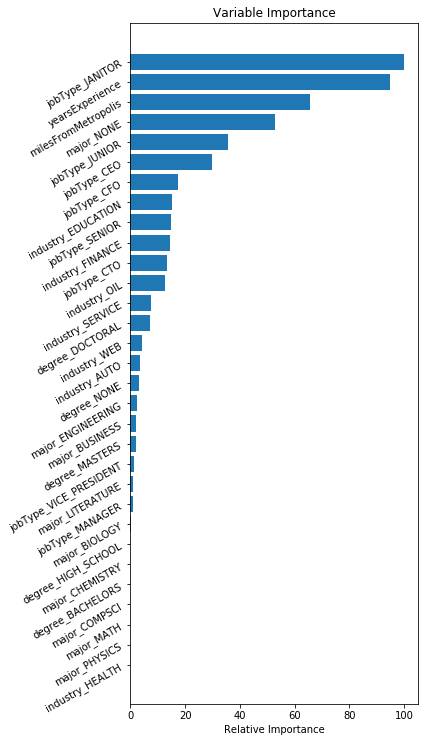

In [48]:
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(6, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_.columns[sorted_idx], rotation=30)
plt.tight_layout()
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

In [ ]:
Rcross7 = sk.model_selection.cross_val_score(lin_reg7,features_model3,target_model1, cv=5)
Rcross7

In [ ]:
# Caluculate MSE
y_hat_model3=lin_reg3.predict(features_model3)

sk.metrics.mean_squared_error(y_hat_model3,target_model1)

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data